In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew # 수치해석 기능(확률분포) 제공
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import math
import re

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ted.csv')

In [57]:
df.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
0,1,1164,4553,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,"['children', 'creativity', 'culture', 'dance',...",47227110
1,2,977,265,544,139,62,58,258,113,443,413,132,56,268,116,131,203,"['alternative energy', 'cars', 'climate change...",3200520
2,3,1286,124,964,45,183,60,104,78,395,230,166,27,146,230,54,142,"['computers', 'entertainment', 'interface desi...",1636292
3,4,1116,200,760,291,32,59,105,36,53,380,1070,132,460,230,35,85,"['MacArthur grant', 'activism', 'business', 'c...",1697550
4,5,1190,593,3202,1390,942,318,110,72,67,5433,2893,4606,3736,2542,248,61,"['Africa', 'Asia', 'Google', 'demo', 'economic...",12005869


In [58]:
df.columns

Index(['video_num', 'duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring', 'tags', 'views'],
      dtype='object')

video_num: 강연을 구분하기 위한 번호 (필요 없는 데이터)

duration: 강연의 길이. 시간의 단위는 초

comments: 시청자들의 댓글/감상평 수

Funny: 연사가 재미있었다는 평의 수

Beautiful: 강연이 아름다웠다는 평의 수

Indeginous: 연사가 똑똑해 보였다는 평의 수

Courageous: 연사가 용기를 줬다는 평의 수

Longwinded: 연사가 말을 장황하게 했다는 평의 수

Confusing: 강연 내용이 혼란스러웠다는 평의 수

Informative: 강연 내용이 유익했다는 평의 수

Fascinating: 강연 내용이 매력적이었다는 평의 수

Unconvincing: 강연 내용이 납득이 잘 안간다는 평의 수

Persuasive: 강연이 설득력 있었다는 평의 수

Jaw-dropping: 강연 내용이 놀라웠다는 평의 수

OK: 강연 내용이 만족스러웠다는 평의 수

Obnoxious: 강연 내용이 불쾌했다는 평의 수

Inspiring: 강연 내용이 동기부여적이었다는 평의 수

tags: 강연을 구분짓기 위한 태그들 (범주형 데이터)

**views: 시청자들이 강연을 시청한 횟수 (예측해야할 종속변수)**

# 문제 1.	
(주)GH는 수집한 데이터들 간의 관계를 이해하기 위해1) 시청자들의 평들 중 comments의 값과 view의 값 간의 관계, 2) Inspiring의 수가 comments의 수에 미치는 영향을 분석하고자 합니다. 1번 분석은 단순 플로팅(plotting)으로, 2번 분석은 단순선형회귀모델로 표현하여 독립 변수가 종속 변수에 어떻게 유의미한 영향을 미치는지 간단하게 설명해주세요. (시각 자료 및 코드를 제외한 답안의 길이는 한 페이지 이내로 제한해주세요.)

## 1.1

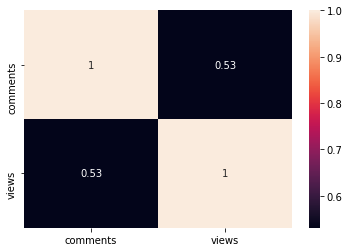

In [59]:
#sns.pairplot(df[['comments','views']])
#plt.show()
sns.heatmap(df[['comments','views']].corr(),
            annot=True)
plt.show()

어느정도의 양의 상관관계가 있는 것으로 보임. 아마 다른 변수들의 영향도 고려해야할 것 같다.

## 1.2

In [60]:
X= np.array(df['Inspiring'])
y= np.array(df['views'])
print(X.shape,y.shape)

(2550,) (2550,)


In [0]:
def make_linearRegression(X,y,W,b,epochs,eta):
  cost_list=[]
  for epoch in range(epochs):
    hypothesis = X*W +b
    cost = np.sum((hypothesis - y)**2) / len(X)
    print(cost)

    # 경사하강법 적용
    gradient_W= np.sum((hypothesis - y)*2*X)/len(X) # error 함수를 w에 대한 편미분
    gradient_b= np.sum((hypothesis - y)*2)/len(X)  # error 함수를 b에 대한 편미분
    
    W-= eta*gradient_W
    b-= eta*gradient_b

    if epoch % 10 == 0:
      print('Epoch ({:10d}/{:10d}) cost: {:10f}, W: {:10f}, b:{:10f}'.format(epoch, epochs, cost, W, b))

  print('W: {:10f}'.format(W))
  print('b: {:10f}'.format(b))
  print('result : ')
  print(X* W + b)

  #return cost

In [62]:
make_linearRegression(X,y,0,0,100,0.001)

9124165509461.54
Epoch (         0/       100) cost: 9124165509461.539062, W: 1081509.711276, b:3396.594963
2.913571330583193e+17
7.259678382807379e+22
1.808926615913884e+28
4.5073835638072274e+33
1.123124974365833e+39
2.7985408612059325e+44
6.973249754562215e+49
1.7375559104235568e+55
4.3295459765693924e+60
1.0788123853038385e+66
Epoch (        10/       100) cost: 1078812385303838509253775361696468407032173249115426975479500898304.000000, W: 1036762475800074163646408477900800.000000, b:129618263443880133211149303808.000000
2.688125195998375e+71
6.698122090363429e+76
1.6690011166221643e+82
4.158724922756501e+87
1.0362481373385082e+93
2.5820659506995755e+98
6.433849512999587e+103
1.6031511334832422e+109
3.994643566958988e+114
9.953632501494678e+119
Epoch (        20/       100) cost: 995363250149467819164957402461532078313502036580474905276956899227125308373610122590662963741940969156324720748464701440.000000, W: 995857295527533704774488037314393442747067789703945578872832.000000, b:12

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


학습 도중 발산을 계속하게 되는 것 같다. Sklearn의 단순 선형회귀모델을 이용해보자.

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print('기울기:',lr_clf.coef_)
print('절편:',lr_clf.intercept_)

기울기: [1957.59607215]
절편: 1637090.7453974355


In [0]:
y_predicted = lr_clf.predict(X.reshape(-1,1))

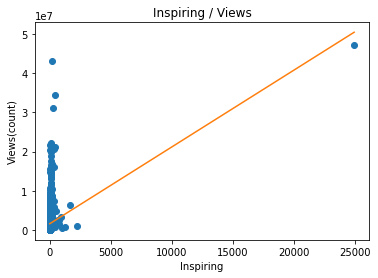

In [66]:
plt.plot(X, y, 'o')
plt.plot(X,lr_clf.predict(X.reshape(-1,1)))
plt.title("Inspiring / Views")
plt.xlabel("Inspiring")
plt.ylabel("Views(count)")

plt.show() 

In [67]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.ols(formula = 'views~ Inspiring', data = df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     460.2
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.46e-94
Time:                        12:34:20   Log-Likelihood:                -40971.
No. Observations:                2550   AIC:                         8.195e+04
Df Residuals:                    2548   BIC:                         8.196e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.637e+06   4.56e+04     35.875      0.0

- R-squared값을 보면 0.153으로 "Views = B0+ B1*'Inspiring' 모델이 Views에 변동성을 15.3% 밖에 설명을 하지 못하므로 설명을 거의 못해주고 있다.
- 독립변수의 유의확률은 0.05보다 작은 값으로 산출이 되어, 종속변수에 영향을 끼치는 것은 유의미 한 것으로 보인다.
- Durbin-Watson의 값은 1.892이므로 잔차들이 자기상관을 거의 가지고 있지 않은 것으로 보인다. ( 0 또는 4에 가까아우면 잔차들이 자기상관을 가지고 있다는 의미)

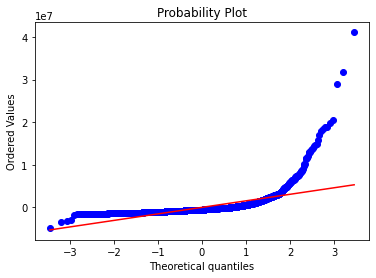

In [68]:
stats.probplot(result.resid, plot=plt)
plt.show()

(array([1.605e+03, 8.640e+02, 5.300e+01, 1.200e+01, 8.000e+00, 5.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-4893480.52769711,  -290865.69208852,  4311749.14352007,
         8914363.97912866, 13516978.81473724, 18119593.65034583,
        22722208.48595442, 27324823.32156301, 31927438.1571716 ,
        36530052.99278019, 41132667.82838878]),
 <a list of 10 Patch objects>)

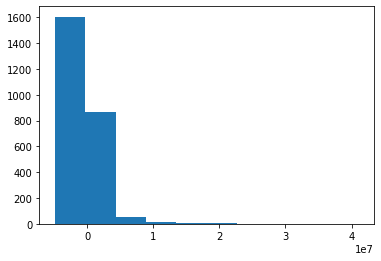

In [69]:
plt.hist(result.resid)

In [70]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       : 3371.317
P-value     :  0.000


데이터가 모형 가정을 만족하면 잔차는 정규성을 따라야하지만 그렇지 않다. 이상치의 영향이 큰 것으로 보인다.

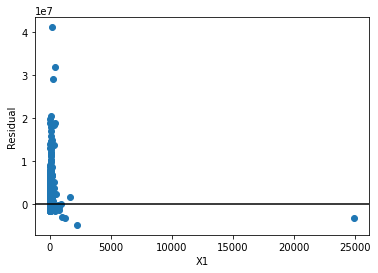

In [71]:
plt.plot(df['Inspiring'], result.resid, 'o')
plt.axhline(y=0, c='k')
plt.xlabel("X1")
plt.ylabel("Residual")
plt.show()

# 문제 2.
2.	GH사의 기존 제품 구매 고객들의 활동 로그를 추적한 결과, 대다수의 고객들이 27번, 1110번, 1995번 영상을 시청했다는 것을 알 수 있었습니다. 만약 GH사가 신제품의 광고를 영상 3개에 첨부하고자 한다면 어떤 영상에 하는 것이 좋을까요? 근거와 함께, 3 개의 영상의 번호(video_num)로 대답해 주세요. (시각 자료 및 코드를 제외한 답안의 길이는 두 페이지 이내로 제한해주세요.)

In [72]:
df['views'].sort_values(ascending=False)

0       47227110
1346    43155405
677     34309432
837     31168150
452     22270883
          ...   
1133      115346
776       112321
237        82488
1112       66668
594        50443
Name: views, Length: 2550, dtype: int64

GH사 제품 구매 고객과 실제 인기 비디오와는 관련이 없는 것으로 보임.

In [73]:
GH=df[(df['video_num']==27)|(df['video_num']==1110)|(df['video_num']==1995)]
GH.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
26,27,1316,507,333,112,127,417,42,91,653,674,1281,324,41,367,93,39,"['astronomy', 'biology', 'cognitive science', ...",2885999
1109,1110,548,161,480,669,879,37,6,364,233,224,39,8,8,14,8,3,"['DNA', 'TEDx', 'biology', 'biotech', 'compute...",1443353
1994,1995,1310,378,94,322,952,510,188,77,75,81,112,53,65,173,198,18,"['animals', 'biology', 'brain', 'cognitive sci...",2471075


'tag' 변수에 나와있는 목록들중에 공통된 점을 찾아보자.

In [74]:
GH.loc[26,'tags']

"['astronomy', 'biology', 'cognitive science', 'cosmos', 'evolution', 'physics', 'psychology', 'science']"

In [75]:
# 필요없는 문자 제거
GH['tags']=GH['tags'].apply(lambda x: x.lstrip('"['))
GH['tags']=GH['tags'].apply(lambda x: x.rstrip(']"'))
GH['tags']=GH['tags'].apply(lambda x: re.sub("'",'',x).split(','))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
tag_list =[]
for i in range(len(GH['tags'].values)):
  for value in GH['tags'].values[i]:
    tag_list.append(value)

In [0]:
tag_dict={}
for tag in tag_list:
  tag=tag.strip()
  if tag in tag_dict.keys():
    tag_dict[tag] = tag_dict[tag] +1
  else:
    tag_dict[tag] = 1

In [78]:
tag_dict

{'DNA': 1,
 'TEDx': 1,
 'animals': 1,
 'astronomy': 1,
 'biology': 3,
 'biotech': 1,
 'brain': 1,
 'cognitive science': 2,
 'computers': 1,
 'consciousness': 1,
 'cosmos': 1,
 'evolution': 2,
 'genetics': 1,
 'memory': 1,
 'mind': 1,
 'molecular biology': 1,
 'neuroscience': 1,
 'physics': 1,
 'programming': 1,
 'psychology': 1,
 'science': 3,
 'science and art': 1,
 'sight': 1,
 'sustainability': 1,
 'visualizations': 1}

'biology' :3, 'science':3 으로 이 tag들과 관련된 video의 views와 독립변수들 간의 관계를 살펴보면 좋을 것 같음.
- 'cognitive science' :2 , 'evolution' :2 인 것 또한 활용을 하는게 좋겠음 이 tag가 있는지 없는지 유무로.

In [0]:
df['tags']=df['tags'].apply(lambda x: x.lstrip('"['))
df['tags']=df['tags'].apply(lambda x: x.rstrip(']"'))
df['tags']=df['tags'].apply(lambda x: re.sub("'",'',x)) 
# 마짐가에 .split(',')을 넣으면 isin() 비교를 할 때 에러 발생함.

In [0]:
num_list =[]
for num in df.index:
  if 'biology' in df['tags'][num]:
    if 'science' in df['tags'][num]:
      num_list.append(num+1) # video_num으로 계산하기 위해 +1 하는 것

In [81]:
df_GH=df[df['video_num'].isin(num_list)]
df_GH.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,tags,views
18,19,1170,163,259,49,185,80,79,119,113,71,363,220,93,210,68,22,"DNA, biology, creativity, design, industrial d...",1074081
26,27,1316,507,333,112,127,417,42,91,653,674,1281,324,41,367,93,39,"astronomy, biology, cognitive science, cosmos,...",2885999
64,65,1355,89,60,168,74,44,20,71,17,353,403,229,79,46,178,5,"TED Prize, ants, biodiversity, biology, ecolog...",1335732
80,81,1399,127,74,241,33,387,448,874,704,18,11,338,234,38,27,14,"DNA, animals, biology, biomimicry, design, env...",1920434
81,82,1011,34,21,54,23,12,199,73,163,8,74,23,10,3,3,0,"DNA, biodiversity, biology, biotech, ecology, ...",560904


'cognitive science','evolution' 의 유무를 묻는 파생 변수를 만들어 주자. 

In [82]:
num_list_1 =[]
num_list_2 =[]
for num in df_GH.index:
  if 'cognitive science' in df_GH['tags'][num]:
    num_list_1.append(num+1)

for num in df_GH.index:
  if 'evolution' in df_GH['tags'][num]:
    num_list_2.append(num+1) 
print('cognitive science 인덱스 :',num_list_1)
print('evolution 인덱스 :',num_list_2)

cognitive science 인덱스 : [27, 584, 1050, 1052, 1059, 1136, 1235, 1257, 1333, 1340, 1359, 1443, 1521, 1552, 1569, 1686, 1733, 1995, 2090]
evolution 인덱스 : [27, 81, 226, 423, 427, 491, 584, 601, 923, 994, 1004, 1029, 1052, 1056, 1132, 1133, 1210, 1252, 1253, 1369, 1443, 1995, 2090, 2168, 2173, 2190, 2239, 2291, 2332]


새로운 변수를 만들자.

In [83]:
df_GH['congnitive_science'] = 0
df_GH['evolution'] = 0

for i in num_list_1:
  df_GH.loc[df['video_num']== i,'congnitive_science'] =1
for i in num_list_2:
  df_GH.loc[df['video_num']== i,'evolution'] =1

df_GH.head()
df_GH.drop('tags',axis=1,inplace=True) # tags는 더이상 필요 없으니 지우자.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [84]:
df_GH.head()

,video_num,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,views,congnitive_science,evolution
18,19,1170,163,259,49,185,80,79,119,113,71,363,220,93,210,68,22,1074081,0,0
26,27,1316,507,333,112,127,417,42,91,653,674,1281,324,41,367,93,39,2885999,1,1
64,65,1355,89,60,168,74,44,20,71,17,353,403,229,79,46,178,5,1335732,0,0
80,81,1399,127,74,241,33,387,448,874,704,18,11,338,234,38,27,14,1920434,0,1
81,82,1011,34,21,54,23,12,199,73,163,8,74,23,10,3,3,0,560904,0,0


각 변수들의 상관계수를 뽑아보자.

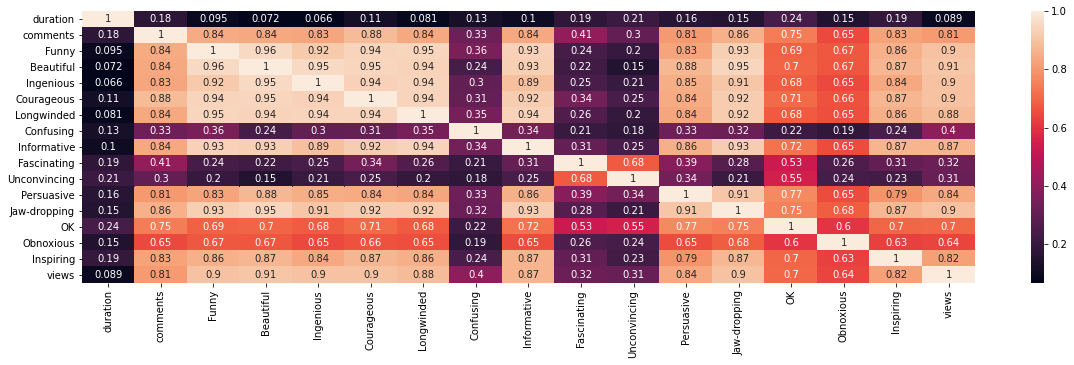

In [85]:
plt.figure(figsize=(20, 5))
sns.heatmap(df_GH.iloc[:,1:-2].corr(),
            annot=True)
plt.show()

In [86]:
video_num = df['video_num']
df_GH.drop('video_num',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


이상치에 덜 민감한 RobustScaler를 사용해 변수들을 표준화 시키자.

In [87]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
robust_scaler.fit(df_GH)
#robust_scaler.transform(df_GH)
df_GH = pd.DataFrame(robust_scaler.transform(df_GH),
                     index=list(df_GH.index.values),
                     columns= list(df_GH.columns))
df_GH.head()

,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,views,congnitive_science,evolution
18,0.839050,0.592965,0.256030,-0.541455,0.183036,-0.226316,-0.082474,0.500000,0.704663,0.933333,5.672414,4.471910,2.586207,10.594595,3.052632,1.523810,0.021812,0.0,0.0
26,1.224274,4.050251,0.530612,-0.328257,-0.075893,1.547368,-0.336770,0.225490,6.300518,14.333333,21.500000,6.808989,0.793103,19.081081,4.368421,3.142857,2.677517,1.0,1.0
64,1.327177,-0.150754,-0.482375,-0.138748,-0.312500,-0.415789,-0.487973,0.029412,-0.290155,7.200000,6.362069,4.674157,2.103448,1.729730,8.842105,-0.095238,0.405311,0.0,0.0
80,1.443272,0.231156,-0.430427,0.108291,-0.495536,1.389474,2.453608,7.901961,6.829016,-0.244444,-0.396552,7.123596,7.448276,1.297297,0.894737,0.761905,1.262301,0.0,1.0
81,0.419525,-0.703518,-0.627087,-0.524535,-0.540179,-0.584211,0.742268,0.049020,1.222798,-0.466667,0.689655,0.044944,-0.275862,-0.594595,-0.368421,-0.571429,-0.730344,0.0,0.0


 클러스터링을 하기전에 PCA를 적용하면 노이즈가 제거되어 클러스터링의 결과를 더 괜찮게 만든다고 한다.

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 10개의 PCA 속성을 가진 PCA 객체를 생성 및 변동성 print
pca = PCA(n_components=10)
pca.fit(df_GH)
print('PCA Component별 변동성:',pca.explained_variance_ratio_)

PCA Component별 변동성: [0.78655142 0.05716009 0.03844115 0.03071817 0.01479263 0.0125369
 0.010693   0.00969843 0.0083368  0.00637118]


2개의 Component가지고 80%의 변동성이 설명이 됨.

In [0]:
# 2개의 컴포넌트를 가진 PCA 변환을 수행
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_GH)

## 클러스터링
- dbscan 이용
 - 잡음 처리에 유용

In [123]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
df_result = dbscan.fit_predict(df_pca)
df_result

array([-1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,  0,
       -1,  0,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,
        0,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,
       -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

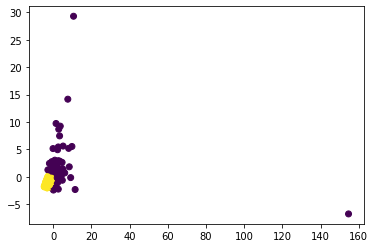

In [125]:
plt.scatter(df_pca[:,0],df_pca[:,1],c=df_result)
plt.show()

In [0]:
df_GH['label'] = df_result

## 최종판단
-  27번, 1110번, 1995번

In [0]:
df_GH['video_num'] = video_num

In [133]:
df_GH[(df_GH['video_num']==27)|(df_GH['video_num']==1110)|(df_GH['video_num']==1995)]['label']

26     -1
1109   -1
1994   -1
Name: label, dtype: int64

라벨이 모두 -1로 되어 있음. -1의 라벨을 가진 video의 변수들과 views의 관계를 보고 판단하면 될 것 같다.

In [0]:
final_df=df_GH[df_GH['label'] ==-1]

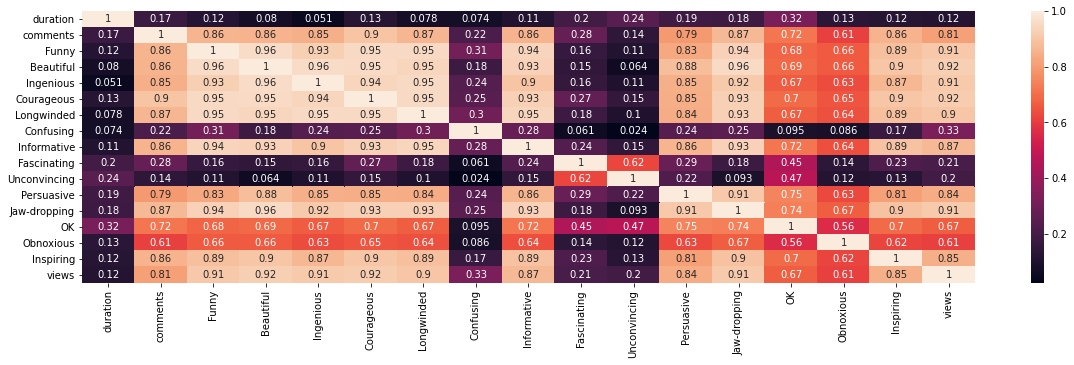

In [138]:
plt.figure(figsize=(20, 5))
sns.heatmap(final_df.iloc[:,:-4].corr(),
            annot=True)
plt.show()

In [139]:
df_GH.columns

Index(['duration', 'comments', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'views',
       'congnitive_science', 'evolution', 'label', 'video_num'],
      dtype='object')

'views'와 상관관계가 강한 2개의 변수('Courageous','Beaufiul) 수가 가장 높은 video (번호 1995)에 광고를 넣으면 가장 적합할 것이라고 생각함.

In [141]:
df_GH[(df_GH['video_num']==27)|(df_GH['video_num']==1110)|(df_GH['video_num']==1995)]

,duration,comments,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,views,congnitive_science,evolution,label,video_num
26,1.224274,4.050251,0.530612,-0.328257,-0.075893,1.547368,-0.336770,0.225490,6.300518,14.333333,21.500000,6.808989,0.793103,19.081081,4.368421,3.142857,2.677517,1.0,1.0,-1,27
1109,-0.802111,0.572864,1.076067,1.556684,3.281250,-0.452632,-0.584192,2.901961,1.948187,4.333333,0.086207,-0.292135,-0.344828,0.000000,-0.105263,-0.285714,0.563049,0.0,0.0,-1,1110
1994,1.208443,2.753769,-0.356215,0.382403,3.607143,2.036842,0.666667,0.088235,0.310881,1.155556,1.344828,0.719101,1.620690,8.594595,9.894737,1.142857,2.069368,1.0,1.0,-1,1995


# 동규방식

In [0]:
df.shape

(2550, 19)

In [0]:
df['video_num'].values # 필요없는 데이터임 지우자.

array([   1,    2,    3, ..., 2548, 2549, 2550])

In [0]:
x=df.drop(['video_num','views','tags'],axis=1) # 'tags' 변수의 활용방안을 생각할 필요가 있을 듯.
y=df['views']

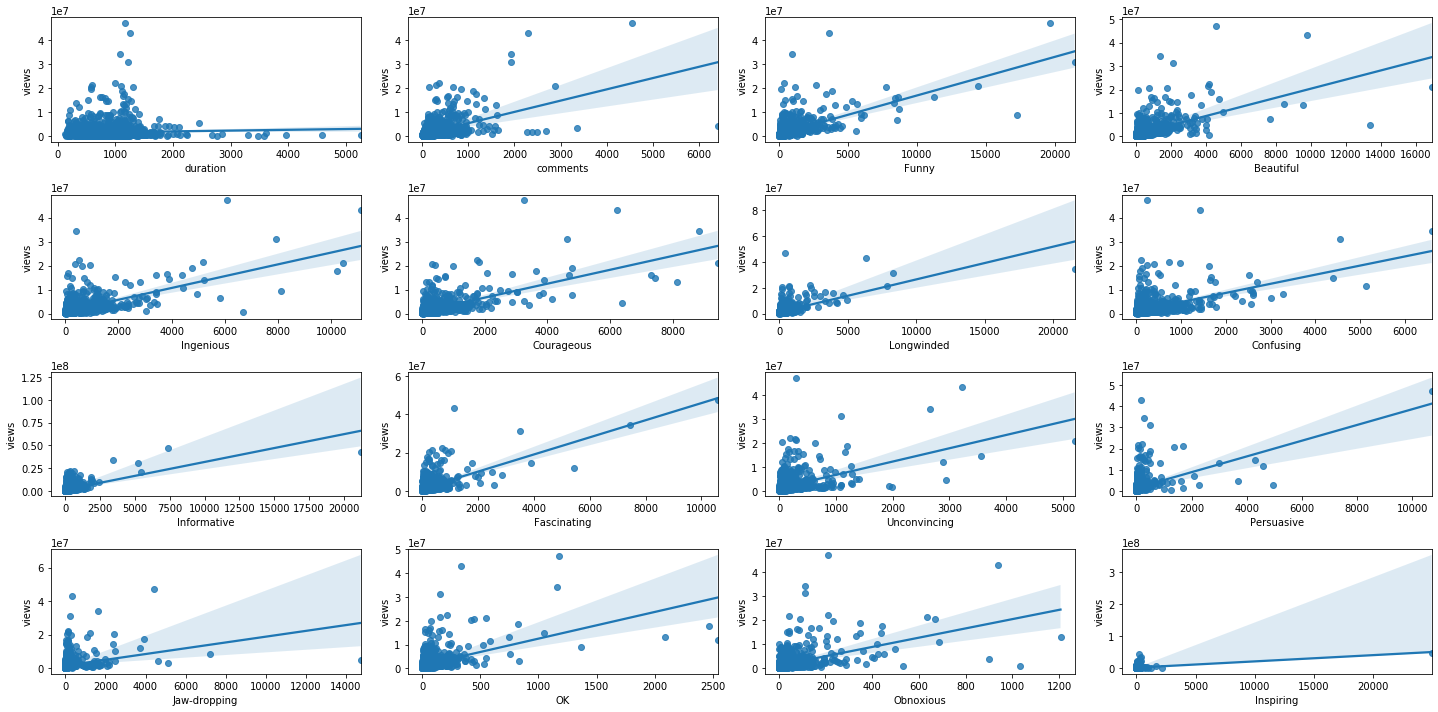

In [0]:
fig, axs = plt.subplots(figsize=(20,10),ncols=4,nrows=4)
lm_featrues = ['duration', 'comments', 'Funny', 'Beautiful', 'Ingenious',
       'Courageous', 'Longwinded', 'Confusing', 'Informative', 'Fascinating',
       'Unconvincing', 'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious',
       'Inspiring']
for i, feature in enumerate(lm_featrues):
  row = int(i/4)
  col = i%4

  sns.regplot(x=feature,y='views',data=df,ax=axs[row][col])
plt.tight_layout()

In [0]:
# train, test(모델 성능 확인을 위해) 분리

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2040, 16)
(2040,)
(510, 16)
(510,)


## 모델링 및 y값 분포 확인

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:3f}'.format(r2_score(y_test,y_preds)))

훈련 세트 점수:0.78
테스트 세트 점수:0.71
MSE:1116025124432.091,RMSE:1056420.903
Variance score:0.712593


MSE가 꽤 크게 나타나는 것 같음.
- 실제값과 예측값이 얼마나 차이가 나는지 확인해보는 것이 좋을 것 같다.

In [0]:
def get_top_error_data(y_test,pred,n_tops=10):
  # DataFrame의 칼럼으로 실제 views의 값과 예측값을 서로 비교할 수 있도록 생성.
  result_df = pd.DataFrame(y_test.values,columns=['real_views'])
  result_df['predicted_views'] = np.round(pred)
  result_df['diff'] = np.abs(result_df['real_views']-result_df['predicted_views'])

  # 예측값과 실제 값이 가장 큰 데이터 순으로 출력.
  print(result_df.sort_values('diff',ascending=False)[:n_tops])

In [0]:
get_top_error_data(y_test,y_preds,n_tops=20)

     real_views  predicted_views        diff
495    15601385        2280656.0  13320729.0
408     8688241        2166682.0   6521559.0
219    17629275       12839360.0   4789915.0
291     8958850        4457394.0   4501456.0
95      9315483       13601959.0   4286476.0
158     4962607        1335733.0   3626874.0
185     5711833        2148803.0   3563030.0
357     8879917        5613859.0   3266058.0
177     8360707        5130471.0   3230236.0
446    14566463       11535535.0   3030928.0
358    14689301       11695441.0   2993860.0
297     1152886        4111976.0   2959090.0
176     6263759        3304757.0   2959002.0
85      4843480        2101925.0   2741555.0
505     2561564        5070505.0   2508941.0
172     8838874        6455227.0   2383647.0
250     4374792        6693673.0   2318881.0
366     7271730        4973105.0   2298625.0
24      4883112        2639871.0   2243241.0
398     4811180        2710344.0   2100836.0


실제 값을 감안하면 예측 오류가 꽤 큰 것으로 보임.
- Target 값의 분포가 왜곡된 형태를 이루고 있는지 확인을 해봐야 할 것 같음.
- Target 값은 정규 분포 형태가 가장 좋음.
 - 왜곡된 경우에는 회귀 예측 성능이 저하되는 경우가 발생하기 쉬움.

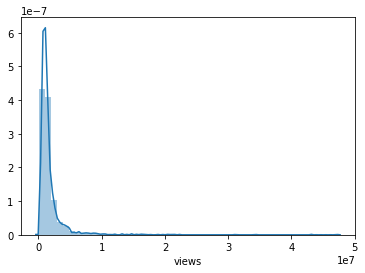

In [0]:
sns.distplot(y)

views 컬럼이 정규분포가 아닌 0~1 사이에 왜곡돼 있는 것을 알 수 있음.
- 로그변환을 통해 정규 분포 형태로 바꾸자.

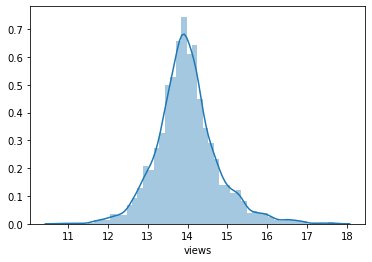

In [0]:
y_log_transform = np.log1p(y)
sns.distplot(y_log_transform)

왜곡 정도가 많이 향상됐음.

In [0]:
# 로그 변환된 y값을 사용하여 학습한 후 평가
X_train,X_test,y_train,y_test = train_test_split(x,y_log_transform,test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

# 테스트 데이터 셋의 Target값은 로그 변환 됐으므로 다시 expm1을 이용해 원래 스케일로 변환
y_test_exp = np.expm1(y_test)

# 예측된 값 또한 로그 변환된 Target을 기반으로 예측을 했기 때문에 다시 expm1을 이용해 원래 스케일로 변환
pred_exp = np.expm1(pred)

mse = mean_squared_error(y_test_exp,pred_exp)
rmse = np.sqrt(mse)

print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))

print('MSE:{0:.3f},RMSE:{1:.3f}'.format(mse,rmse))
print('Variance score:{0:3f}'.format(r2_score(y_test_exp,pred_exp)))

훈련 세트 점수:0.43
테스트 세트 점수:0.41
MSE:13259776521985.838,RMSE:3641397.606
Variance score:-2.414755


MSE, RMSE 둘다 오히려 증가를 했다. 이유가 뭘까..?
- 독립변수들의 피처의 회귀 계수 값을 시각화 해보자.
- Score를 보면 과소적합인 것 같음. 전처리를 해서 Score를 올려보자.

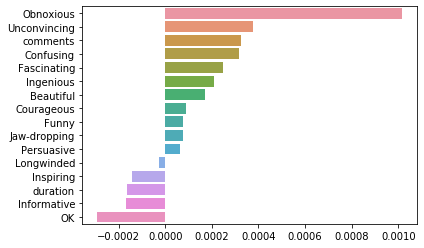

In [0]:
coef = pd.Series(lr.coef_,index=x.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values,y=coef_sort.index)

Obnoxious(강연 내용이 불쾌했다는 평의 수)가 독보적으로 높은 이유가 뭘까?
- 이제 데이터 전처리를 하면서 각각의 변수들을 하나씩 다뤄보자.

## Data Preprocessing

In [0]:
df.isnull().sum() # 결측치 X

video_num       0
duration        0
comments        0
Funny           0
Beautiful       0
Ingenious       0
Courageous      0
Longwinded      0
Confusing       0
Informative     0
Fascinating     0
Unconvincing    0
Persuasive      0
Jaw-dropping    0
OK              0
Obnoxious       0
Inspiring       0
tags            0
views           0
dtype: int64

In [0]:
# cols=df.drop('tags',axis=1).columns
# sns.pairplot(df[cols],height=2.5)
# plt.tight_layout()
# plt.show()

In [0]:
cm = np.corrcoef(df[cols].values.T)
plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 #annot_kws={'size':20},
                 yticklabels=cols,
                 xticklabels=cols)

NameError: ignored

1. 상관계수가 높은 변수들만 뽑아 파생변수를 만들어 보자.
2. 다항회귀 방법을 적용하여 비선형 관계 모델링을 적용해 보자.

### 1. 상관계수가 높은 변수들만 뽑아 파생변수를 만들어 모델링

In [0]:
# views와 상관관계가 높은 feature만 뽑아보자.
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["views"])>0.5]
plt.figure(figsize=(10,10),facecolor='w')
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
df_tcr= df[top_corr_features]

In [0]:
# 파생변수 제작
col_list = df_tcr.drop('views',axis=1).columns

for col_1 in col_list:


### 2. 다항회귀 방법을 적용하여 비선형 관계 모델링을 적용